In [16]:
# Importation de la base de données avec le séparateur ;
import pandas as pd
df = pd.read_csv("C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/new_Base_CDM_balanced_V2.csv", sep=";")
df

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
0,No_Displ,2.0,20.20,47400,36,CORA,72.0,No_Feat
1,No_Displ,2.0,11.90,62000,24,LECLERC,48.0,No_Feat
2,No_Displ,8.0,29.52,60661,60,AUCHAN,480.0,No_Feat
3,No_Displ,2.0,16.20,59677,19,CARREFOUR,38.0,No_Feat
4,No_Displ,5.0,62.10,142602,50,CORA,250.0,No_Feat
...,...,...,...,...,...,...,...,...
25777,Displ,1.0,10.70,4033,40,CARREFOUR MARKET,40.0,No_Feat
25778,Displ,5.0,34.45,4033,35,CARREFOUR MARKET,175.0,No_Feat
25779,Displ,12.0,81.72,4033,35,CARREFOUR MARKET,420.0,No_Feat
25780,Displ,5.0,29.75,4033,24,CARREFOUR MARKET,120.0,No_Feat


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 0 to 25781
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Display           25782 non-null  object 
 1   cor_sales_in_vol  25782 non-null  float64
 2   cor_sales_in_val  25782 non-null  float64
 3   CA_mag            25782 non-null  int64  
 4   value             25782 non-null  int64  
 5   ENSEIGNE          25782 non-null  object 
 6   VenteConv         25782 non-null  float64
 7   Feature           25782 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [55]:
# Connaitre le nombre de modalité de la variable enseigne (nunique() nous donne le nombre 
#tendis que unique() nous retourne une liste avec le nom de classes)
df['ENSEIGNE'].nunique()

array(['CORA', 'LECLERC', 'AUCHAN', 'CARREFOUR', 'CASINO', 'SUPER U',
       'GEANT', 'CARREFOUR MARKET', 'FRANPRIX', 'INTERMARCHE',
       'ECOMARCHE', 'MONOPRIX', 'SIMPLY MARKET', 'OTHERS', 'MATCH',
       'PRISUNIC', 'HYPER U', 'SHOPI', 'MARCHE U'], dtype=object)

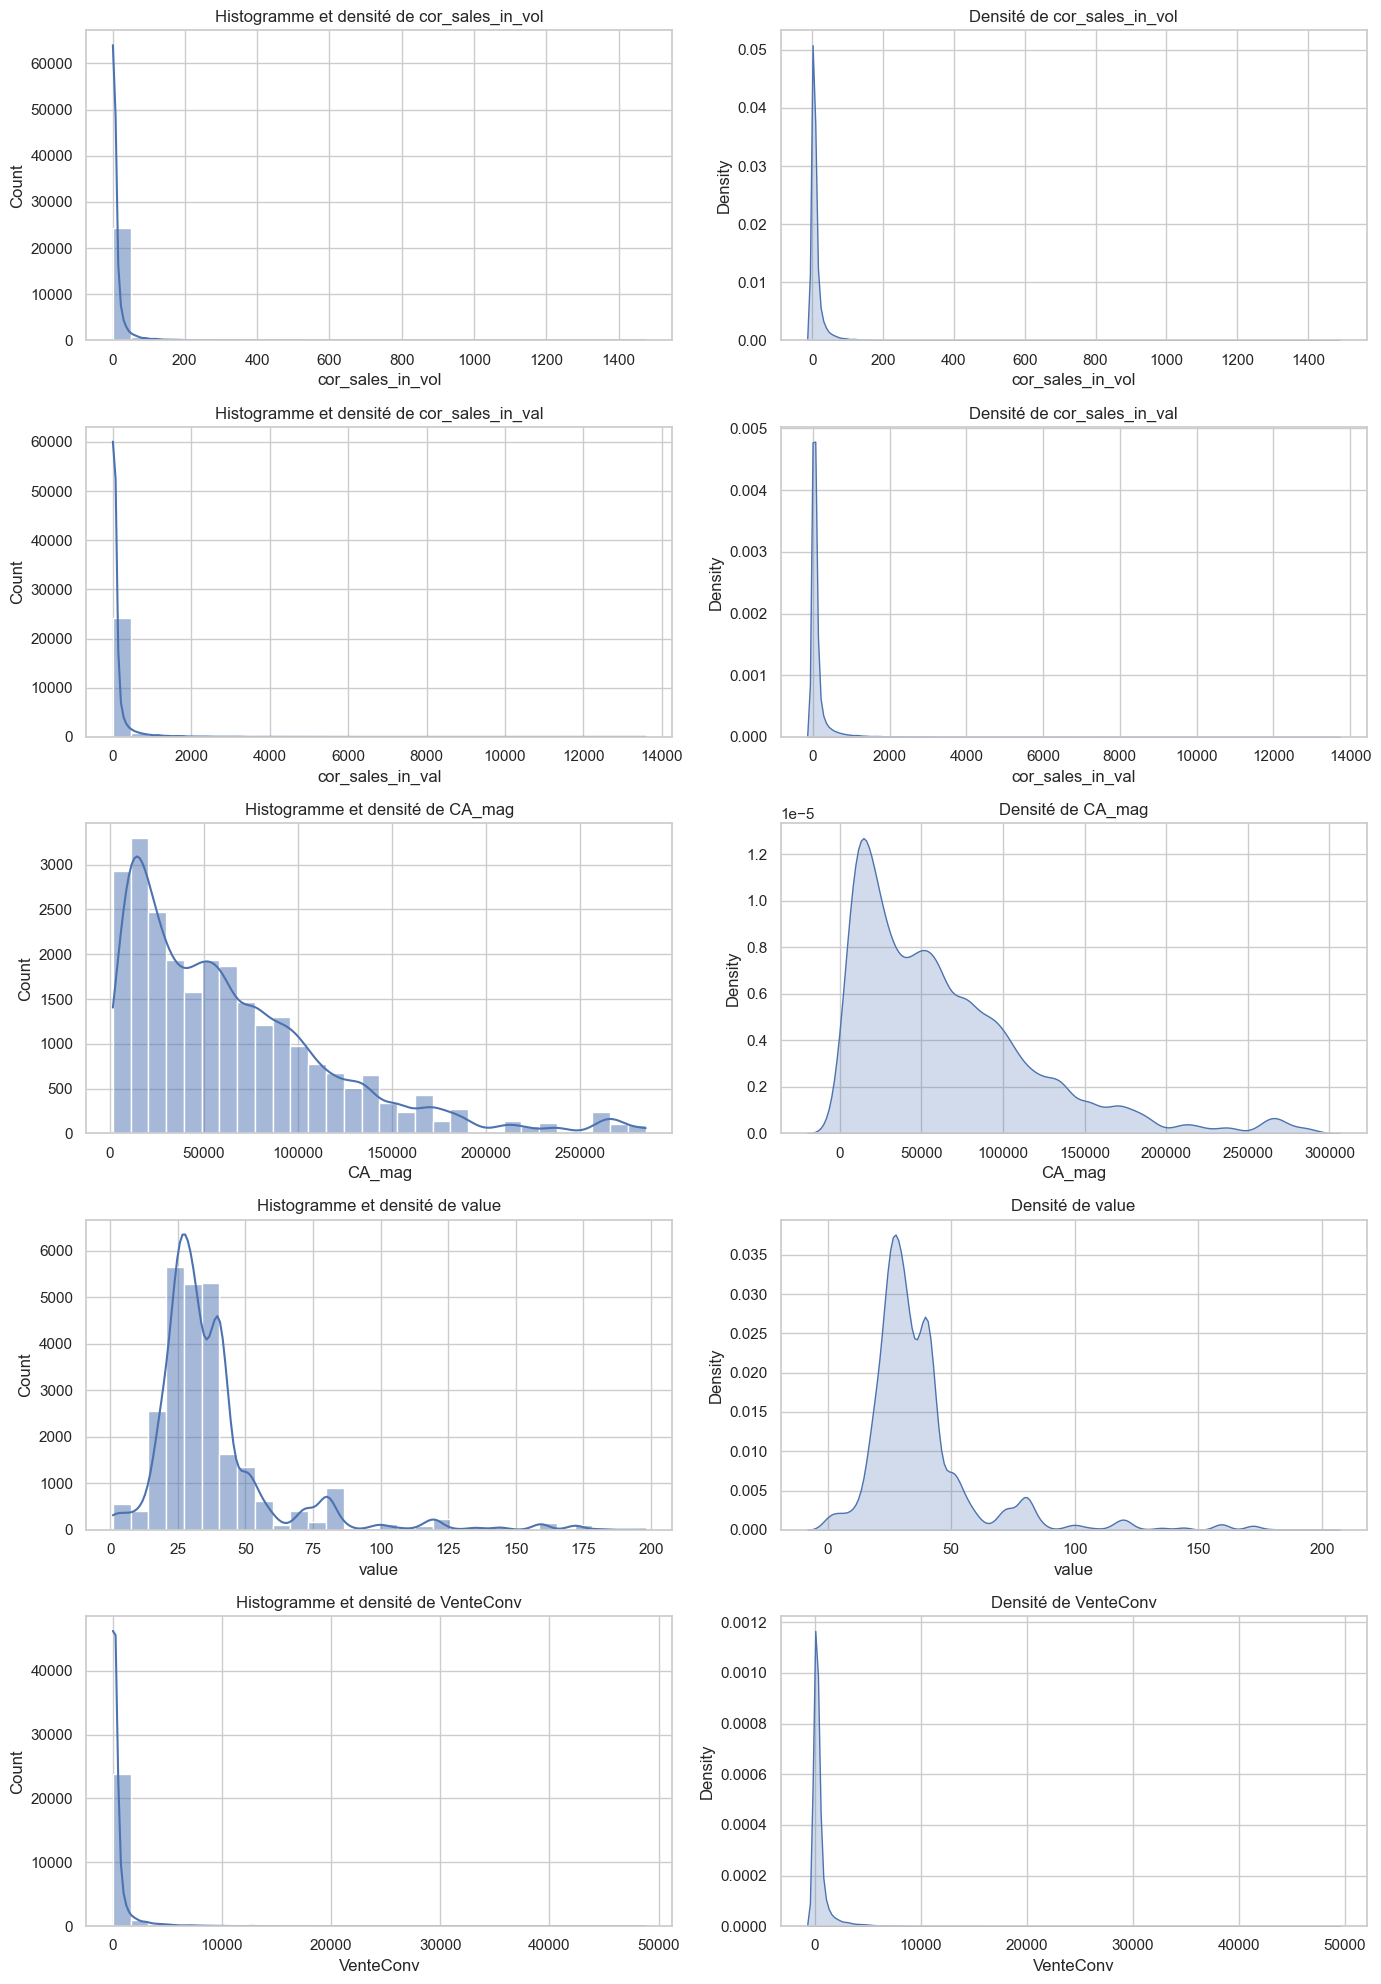

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques (affiche une grille avec un background blanc)
sns.set(style='whitegrid')

# Liste qui contient les noms des varibles quantitatives
variables_quantitatives = ['cor_sales_in_vol', 'cor_sales_in_val', 'CA_mag', 'value', 'VenteConv']

# Tracer la densité et l'histogramme pour chaque variable quantitative
fig, axes = plt.subplots(nrows=len(variables_quantitatives), ncols=2, figsize=(14, 4 * len(variables_quantitatives)))

for i, var in enumerate(variables_quantitatives):
    # Histogramme avec courbe de densité
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogramme et densité de {var}')
    
    # Courbe de densité seule
    sns.kdeplot(df[var], ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'Densité de {var}')

plt.tight_layout()
plt.show()


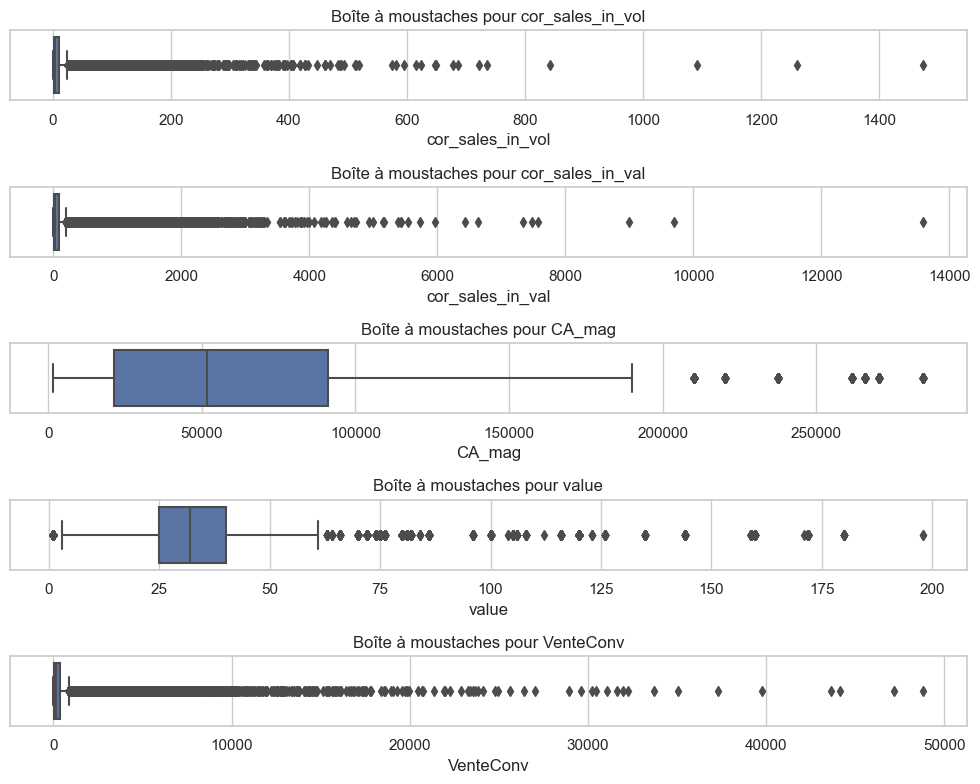

In [5]:
# Configuration du style des graphiques
sns.set(style='whitegrid')

# Tracer les boîtes à moustaches pour chaque variable quantitative
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables_quantitatives):
    plt.subplot(len(variables_quantitatives), 1, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boîte à moustaches pour {var}')
plt.tight_layout()
plt.show()

In [17]:
# Importer les bibliothèques nécessaires pour winsoriser les colonnes avec des valeurs aberrantes
from scipy.stats.mstats import winsorize
from scipy.stats import skew

# Une boucle pour traiter le cas de chaque variable  
for var in variables_quantitatives:
    # Calculer l'asymétrie (écart des valeurs par rapport à la moyenne) de cette variable pour définir le coté à winsoriser
    skewness = skew(df[var])

    # Nous spécifions les limites comme un pourcentage des données de chaque côté.
    # Par exemple, limits=[0.05, 0.05] signifie que les 5% des valeurs les plus basses et 
    # les 5% des valeurs les plus hautes seront remplacées.
    
    if skewness > 1:
        # Asymétrie positive, winsoriser le côté supérieur (coté droit dans la courbe de l'histogramme)
        df[var] = winsorize(df[var], limits=[0, 0.1])
    elif skewness < -1:
        # Asymétrie négative, winsoriser le côté inférieur (coté gauche dans la courbe de l'histogramme)
        df[var] = winsorize(df[var], limits=[0.05, 0])
    else:
        # Asymétrie modérée, pas de winsorisation ou winsorisation symétrique
        df[var] = winsorize(df[var], limits=[0.05, 0.05])

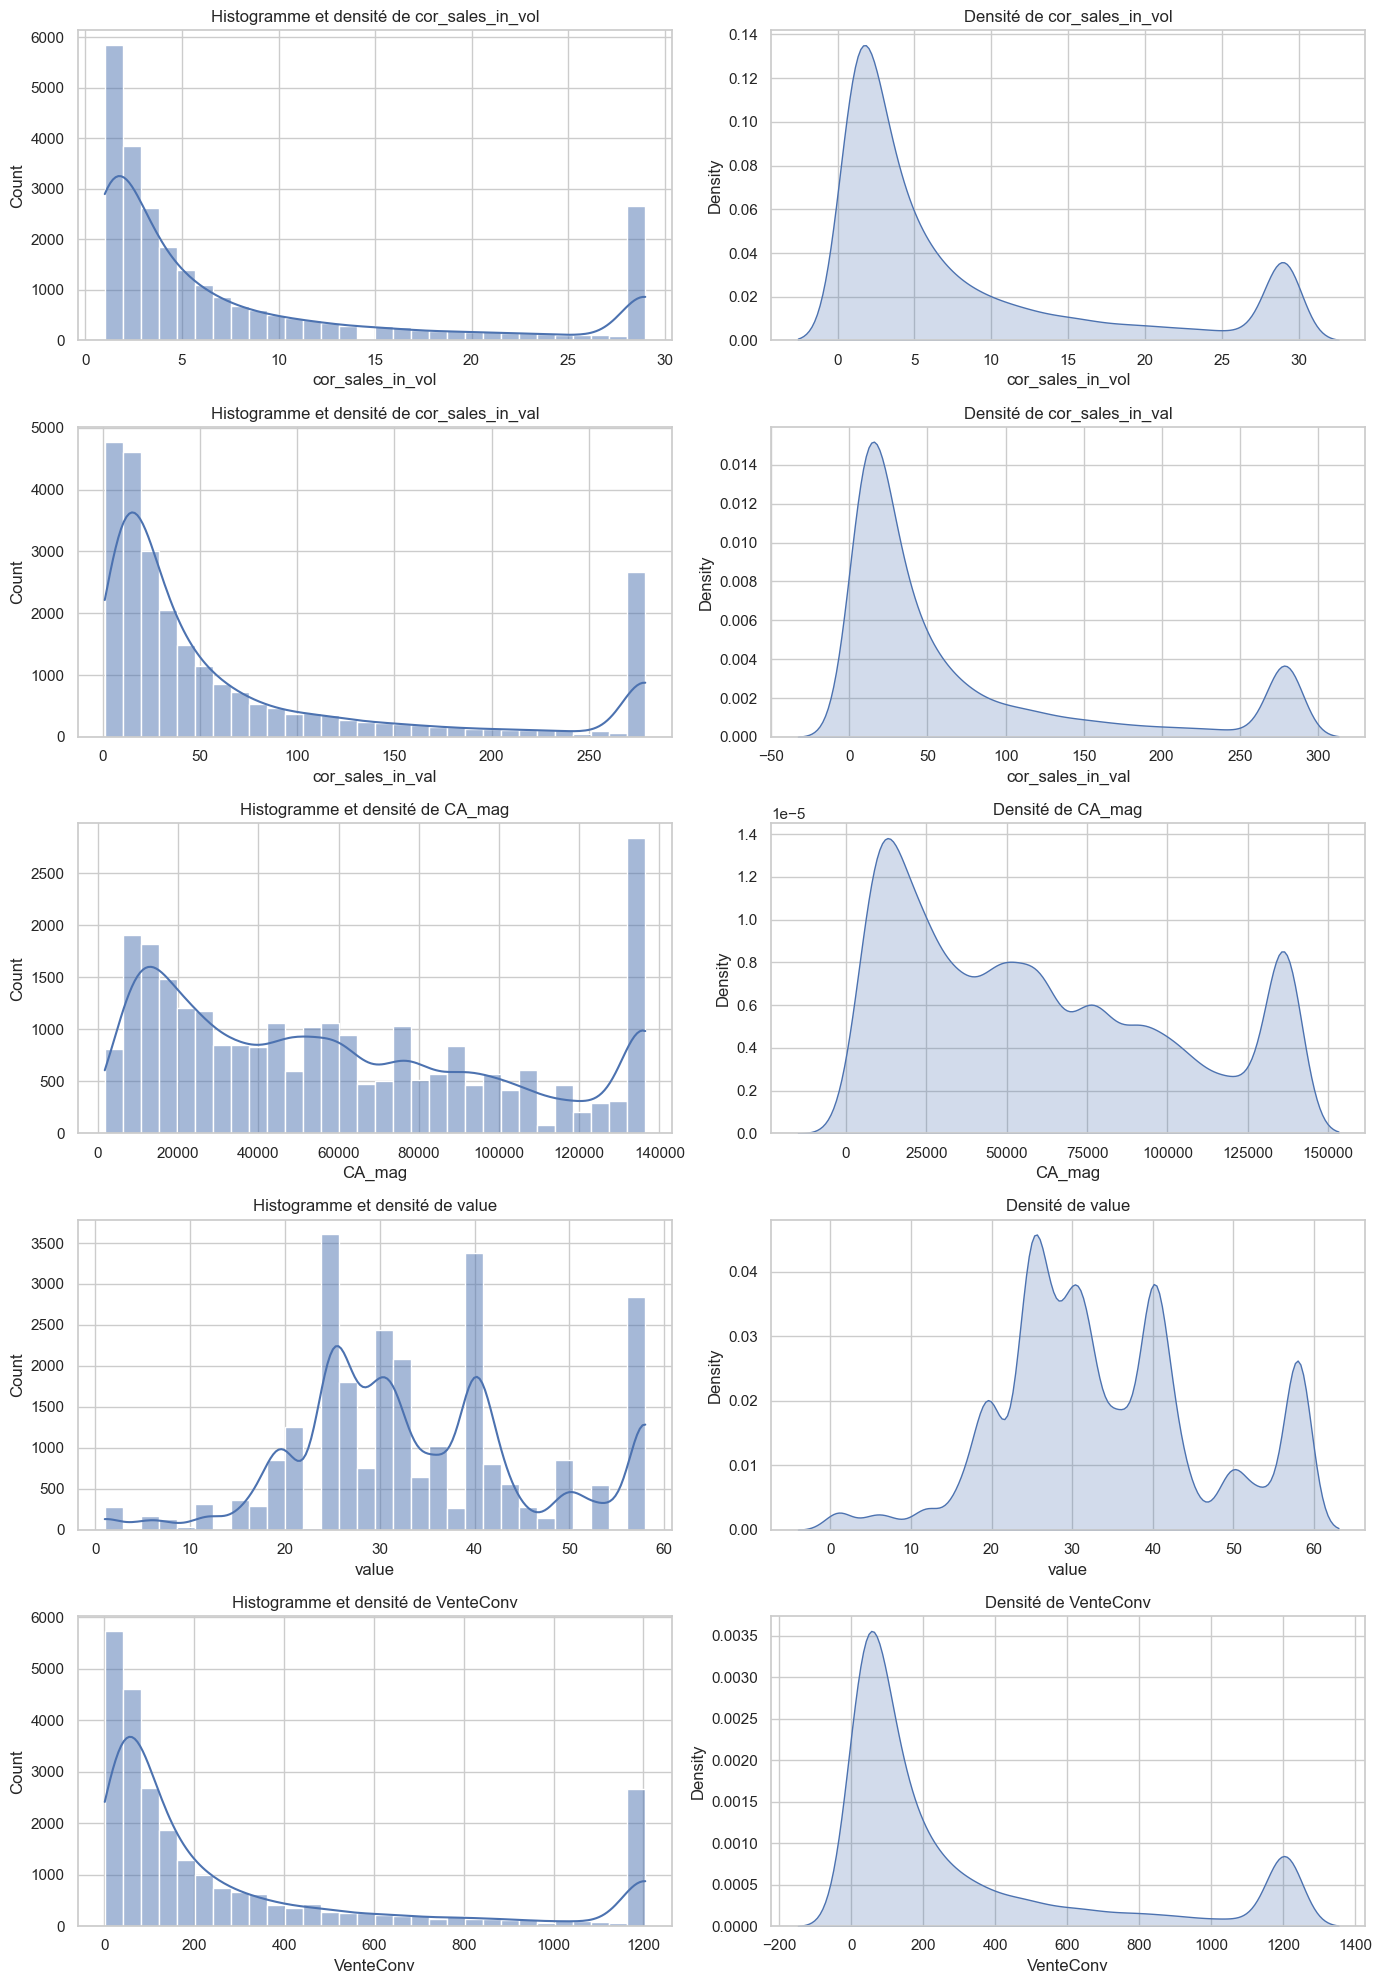

In [7]:
# Configuration du style des graphiques
sns.set(style='whitegrid')

# Tracer la densité et l'histogramme pour chaque variable quantitative
fig, axes = plt.subplots(nrows=len(variables_quantitatives), ncols=2, figsize=(14, 4 * len(variables_quantitatives)))

for i, var in enumerate(variables_quantitatives):
    # Histogramme avec courbe de densité
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogramme et densité de {var}')
    
    # Courbe de densité seule
    sns.kdeplot(df[var], ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'Densité de {var}')

plt.tight_layout()
plt.show()


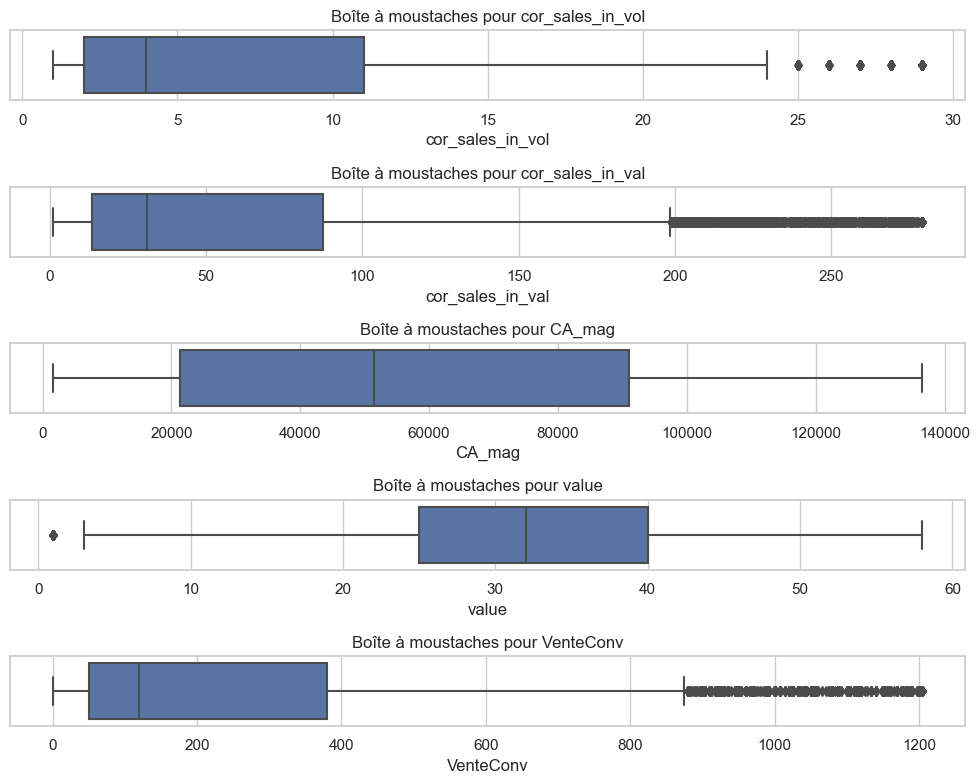

In [8]:
# Configuration du style des graphiques
sns.set(style='whitegrid')

# Tracer les boîtes à moustaches pour chaque variable quantitative
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables_quantitatives):
    plt.subplot(len(variables_quantitatives), 1, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boîte à moustaches pour {var}')
plt.tight_layout()
plt.show()

In [17]:
!pip install feature_engine

  Obtaining dependency information for feature_engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/328.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/328.9 kB 640.0 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/328.9 kB 653.6 kB/s eta 0:00:01
   --------------------------- ------------ 225.3/328.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 328.9/328.9 kB 1.9 MB/s eta 0:00:00


In [18]:
from feature_engine.discretisation import DecisionTreeDiscretiser
from sklearn import tree
import matplotlib.pyplot as plt
import os

# On va discrétiser les variables continues en utilisant des arbres de décision
# Initialisation du discretiseur  avec les hyperparamètres ajustés (profondeur max de l'arbre = 4
# et effectif minimal dans un noeud terminal = 1750) 

dt_discretiser = DecisionTreeDiscretiser(cv=3, scoring='accuracy',
                                         variables=variables_quantitatives,
                                         regression=False,
                                         param_grid={'max_depth': [4], 
                                                     'min_samples_leaf': [1750]})

# Ajustement du discretiseur avec les données
dt_discretiser.fit(df[variables_quantitatives], df['Display'])

# Application de la discrétisation
df[variables_quantitatives] = dt_discretiser.transform(df[variables_quantitatives])

# Dossier de destination pour enregistrer les graphiques
output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/Graphes et arbres"

# Visualisation et enregistrement des arbres de décision
for var in variables_quantitatives:
    decision_tree_model = dt_discretiser.binner_dict_[var].best_estimator_

    # Convertir classes_ en liste pour class_names
    class_names_list = decision_tree_model.classes_.tolist() if hasattr(decision_tree_model, 'classes_') else None

    # Visualiser l'arbre de décision sans afficher l'indice gini 
    plt.figure(figsize=(20, 10))
    tree.plot_tree(decision_tree_model, filled=True, feature_names=[var],
                   class_names=class_names_list,
                   impurity=False, proportion=True)
    
    # Enregistrer le graphique
    plt.savefig(f"{output_folder}/arbre_decision_{var}.png", bbox_inches='tight')
    plt.close()  # Fermer la figure pour libérer de la mémoire

In [20]:
for var in variables_quantitatives :
    print(f"{var} a {df[var].nunique()} modalités.")

cor_sales_in_vol a 9 modalités.
cor_sales_in_val a 7 modalités.
CA_mag a 8 modalités.
value a 9 modalités.
VenteConv a 9 modalités.


In [22]:
import matplotlib.pyplot as plt

# Parcourir chaque variable discrétisée et tracer son histogramme
for var in variables_quantitatives:
    # Tracer l'histogramme de la variable discrétisée
    plt.figure(figsize=(10, 5))
    df[var].value_counts().sort_index().plot(kind='bar')
    
    # Définir le titre et les labels
    plt.title(f'Histogramme de la variable discrétisée {var}')
    plt.xlabel('Bins')
    plt.ylabel('Nombre d\'observations')
    
     # Enregistrer le graphique
    plt.savefig(f"{output_folder}/distribution{var}.png", bbox_inches='tight')
    plt.close()  # Fermer la figure pour libérer de la mémoire

In [24]:
# Encodage one-hot pour la variable 'Display' (les résultats seront stockées dans une nouvelle colonne)
# Convertit 'Displ' en 1 et les autres valeurs en 0 
#(.astype(int) pour que les valeurs binaires obtenues soient des nombres entiers)
df['Display_Encoded'] = (df['Display'] == 'Displ').astype(int)

# Encodage one-hot pour la variable 'Feature'
# Convertit 'Feat' en 1 et autres valeurs en 0
df['Feature_Encoded'] = (df['Feature'] == 'Feat').astype(int)
df

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature,Display_Encoded,Feature_Encoded
0,No_Displ,0.633092,0.649042,0.499429,0.515103,CORA,0.588235,No_Feat,0,0
1,No_Displ,0.633092,0.649042,0.499429,0.505840,LECLERC,0.729606,No_Feat,0,0
2,No_Displ,0.477121,0.595757,0.499429,0.168343,AUCHAN,0.288277,No_Feat,0,0
3,No_Displ,0.633092,0.649042,0.499429,0.596491,CARREFOUR,0.676426,No_Feat,0,0
4,No_Displ,0.563414,0.447286,0.555423,0.601642,CORA,0.531903,No_Feat,0,0
...,...,...,...,...,...,...,...,...,...,...
25777,Displ,0.639609,0.649042,0.568297,0.515103,CARREFOUR MARKET,0.676426,No_Feat,1,0
25778,Displ,0.563414,0.595757,0.568297,0.515103,CARREFOUR MARKET,0.547305,No_Feat,1,0
25779,Displ,0.359909,0.447286,0.568297,0.515103,CARREFOUR MARKET,0.288277,No_Feat,1,0
25780,Displ,0.563414,0.595757,0.568297,0.505840,CARREFOUR MARKET,0.647488,No_Feat,1,0


In [30]:
df['Feature_Encoded']

0        0
1        0
2        0
3        0
4        0
        ..
25777    0
25778    0
25779    0
25780    0
25781    0
Name: Feature_Encoded, Length: 25782, dtype: int32

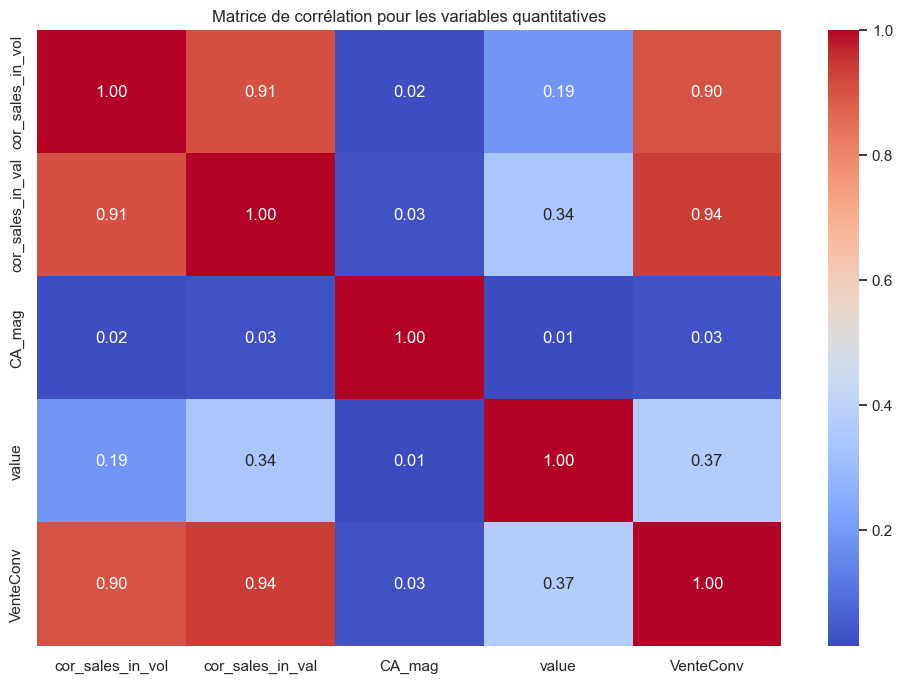

In [31]:
# Calculer la matrice de corrélation des variables quantitatives
corr_matrix = df[variables_quantitatives].corr()

# Créer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Ajouter des titres et des labels
plt.title('Matrice de corrélation pour les variables quantitatives')
plt.show()

In [33]:
from scipy.stats import chi2_contingency

# 'categorical_variables' est la liste des noms de toutes les variables catégorielles discrétisées, binaires et textuelles
categorical_variables = variables_quantitatives + ['Feature_Encoded', 'ENSEIGNE']

# Réaliser le test CHI-2 pour chaque variable catégorielle
for var in categorical_variables:
    contingency_table = pd.crosstab(df[var], df['Display_Encoded'])  
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05 :
        print(f"Chi2 test for {var}:  p-value < 0.05 => {var} explique la variable cible ")
    else : 
        print(f"Chi2 test for {var}:  p-value > 0.05 => {var} n'explique pas la variable cible ")

Chi2 test for cor_sales_in_vol:  p-value < 0.05 => cor_sales_in_vol explique la variable cible 
Chi2 test for cor_sales_in_val:  p-value < 0.05 => cor_sales_in_val explique la variable cible 
Chi2 test for CA_mag:  p-value < 0.05 => CA_mag explique la variable cible 
Chi2 test for value:  p-value < 0.05 => value explique la variable cible 
Chi2 test for VenteConv:  p-value < 0.05 => VenteConv explique la variable cible 
Chi2 test for Feature_Encoded:  p-value < 0.05 => Feature_Encoded explique la variable cible 
Chi2 test for ENSEIGNE:  p-value < 0.05 => ENSEIGNE explique la variable cible 


In [34]:
# Préparer un dataset de transition pour plus tard (il ne contient pas les colonnes originales de Display et Feature)
categorical_variables += ['Display_Encoded'] 
df1 = df[categorical_variables]
df1

,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,VenteConv,Feature_Encoded,ENSEIGNE,Display_Encoded
0,0.633092,0.649042,0.499429,0.515103,0.588235,0,CORA,0
1,0.633092,0.649042,0.499429,0.505840,0.729606,0,LECLERC,0
2,0.477121,0.595757,0.499429,0.168343,0.288277,0,AUCHAN,0
3,0.633092,0.649042,0.499429,0.596491,0.676426,0,CARREFOUR,0
4,0.563414,0.447286,0.555423,0.601642,0.531903,0,CORA,0
...,...,...,...,...,...,...,...,...
25777,0.639609,0.649042,0.568297,0.515103,0.676426,0,CARREFOUR MARKET,1
25778,0.563414,0.595757,0.568297,0.515103,0.547305,0,CARREFOUR MARKET,1
25779,0.359909,0.447286,0.568297,0.515103,0.288277,0,CARREFOUR MARKET,1
25780,0.563414,0.595757,0.568297,0.505840,0.647488,0,CARREFOUR MARKET,1


In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Création de l'arbre de décision pour scinder la base de données
# Préparation des données(on retire la variable cible et on la met à part)
X = pd.get_dummies(df1.drop('Display_Encoded', axis=1), columns=['ENSEIGNE'])
y = df['Display_Encoded']

# Ajustement du modèle d'arbre de décision
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1750)
tree_model.fit(X, y)

# Conversion de l'Index des noms de caractéristiques en liste
feature_names_list = X.columns.tolist()

# Visualisation de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names_list, class_names=['No-Display', 'Display'], impurity=False, proportion=True)
plt.title('Arbre de décision pour la segmentation')

output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/Graphes et arbres"
# Enregistrement de l'arbre de décision dans un fichier
plt.savefig(f"{output_folder}/segmentation.png", bbox_inches='tight')
plt.close()  # Fermer la figure pour libérer de la mémoire


In [47]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Séparation de la base de données en 6 bases (une base pour chaque noeud terminal de l'arbre de décision)
# Obtention des ID de nœuds terminaux pour chaque observation
leaf_ids = tree_model.apply(X)

# Ajout des ID de feuilles au DataFrame d'origine (c'est les catégories des groupes de données, chaque groupe à un Leaf_id différent)
df['Leaf_ID'] = leaf_ids

# Dossier de destination pour enregistrer les fichiers CSV
output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/datasets"
os.makedirs(output_folder, exist_ok=True)

# Segmenter le DataFrame et enregistrer chaque segment dans un fichier CSV
for leaf_id in df['Leaf_ID'].unique():
    # Chaque segement ne prendra de df que les données qui correspondent à son Leaf_ID avec la condition df['Leaf_ID'] == leaf_id
    segment = df[df['Leaf_ID'] == leaf_id]
    segment.drop(columns=['Leaf_ID'], inplace=True)  # on retire la colonne Leaf_ID du nouveau segment
    filename = os.path.join(output_folder, f"data_{leaf_id}.csv")
    segment.to_csv(filename, index=False) # On  le stock sous format csv

C:\Users\zzaka\AppData\Local\Temp\ipykernel_12580\3395173800.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment.drop(columns=['Leaf_ID'], inplace=True)  # Optionnel, retirer la colonne Leaf_ID
C:\Users\zzaka\AppData\Local\Temp\ipykernel_12580\3395173800.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment.drop(columns=['Leaf_ID'], inplace=True)  # Optionnel, retirer la colonne Leaf_ID
C:\Users\zzaka\AppData\Local\Temp\ipykernel_12580\3395173800.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [52]:
# On stock les segements obtenus dans une liste

dataframes = []
for i in range (1, 7):
    df_tempo = pd.read_csv(f"C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/datasets/data_{i}.csv")
    dataframes.append(df_tempo)
    df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Display           2589 non-null   object 
 1   cor_sales_in_vol  2589 non-null   float64
 2   cor_sales_in_val  2589 non-null   float64
 3   CA_mag            2589 non-null   float64
 4   value             2589 non-null   float64
 5   ENSEIGNE          2589 non-null   object 
 6   VenteConv         2589 non-null   float64
 7   Feature           2589 non-null   object 
 8   Display_Encoded   2589 non-null   int64  
 9   Feature_Encoded   2589 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 202.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Display           14734 non-null  object 
 1   cor_sales_

In [59]:
# On stock les différentes valeurs de ENSEIGNE dans une liste
list_class = df['ENSEIGNE'].unique()

# Pour chaque ENSEIGNE dans la liste on crée une colonne de valeurs catégorielles binaire
# la nouvelle colonne reçoit 1 si la valeur de ENSEIGNE correspond au nom de la colonnes, reçoit à sinon
for e in list_class :
    df[e] = (df['ENSEIGNE'] == e).astype(int)

df

,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature,Display_Encoded,Feature_Encoded,...,INTERMARCHE,ECOMARCHE,MONOPRIX,SIMPLY MARKET,OTHERS,MATCH,PRISUNIC,HYPER U,SHOPI,MARCHE U
0,No_Displ,0.633092,0.649042,0.499429,0.515103,CORA,0.588235,No_Feat,0,0,...,0,0,0,0,0,0,0,0,0,0
1,No_Displ,0.633092,0.649042,0.499429,0.505840,LECLERC,0.729606,No_Feat,0,0,...,0,0,0,0,0,0,0,0,0,0
2,No_Displ,0.477121,0.595757,0.499429,0.168343,AUCHAN,0.288277,No_Feat,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No_Displ,0.633092,0.649042,0.499429,0.596491,CARREFOUR,0.676426,No_Feat,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No_Displ,0.563414,0.447286,0.555423,0.601642,CORA,0.531903,No_Feat,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25777,Displ,0.639609,0.649042,0.568297,0.515103,CARREFOUR MARKET,0.676426,No_Feat,1,0,...,0,0,0,0,0,0,0,0,0,0
25778,Displ,0.563414,0.595757,0.568297,0.515103,CARREFOUR MARKET,0.547305,No_Feat,1,0,...,0,0,0,0,0,0,0,0,0,0
25779,Displ,0.359909,0.447286,0.568297,0.515103,CARREFOUR MARKET,0.288277,No_Feat,1,0,...,0,0,0,0,0,0,0,0,0,0
25780,Displ,0.563414,0.595757,0.568297,0.505840,CARREFOUR MARKET,0.647488,No_Feat,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.info()

array(['CORA', 'LECLERC', 'AUCHAN', 'CARREFOUR', 'CASINO', 'SUPER U',
       'GEANT', 'CARREFOUR MARKET', 'FRANPRIX', 'INTERMARCHE',
       'ECOMARCHE', 'MONOPRIX', 'SIMPLY MARKET', 'OTHERS', 'MATCH',
       'PRISUNIC', 'HYPER U', 'SHOPI', 'MARCHE U'], dtype=object)

In [62]:
# On retire la colonne Leaf_ID qui nous a servit tout à l'heure
df = df.drop('Leaf_ID', axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 0 to 25781
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Display           25782 non-null  object 
 1   cor_sales_in_vol  25782 non-null  float64
 2   cor_sales_in_val  25782 non-null  float64
 3   CA_mag            25782 non-null  float64
 4   value             25782 non-null  float64
 5   ENSEIGNE          25782 non-null  object 
 6   VenteConv         25782 non-null  float64
 7   Feature           25782 non-null  object 
 8   Display_Encoded   25782 non-null  int32  
 9   Feature_Encoded   25782 non-null  int32  
 10  CORA              25782 non-null  int32  
 11  LECLERC           25782 non-null  int32  
 12  AUCHAN            25782 non-null  int32  
 13  CARREFOUR         25782 non-null  int32  
 14  CASINO            25782 non-null  int32  
 15  SUPER U           25782 non-null  int32  
 16  GEANT             25782 non-null  int32 

In [67]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.2 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.2 MB 8.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.9/9.2 MB 8.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/9.2 MB 11.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.3/9.2 MB 10.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.2 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/9.2 MB 9.0 MB/s eta 0:00:01
   ----------------- -------------

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dossier de destination pour enregistrer les matrices de confusion
output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/datasets"

# Dictionnaire pour enregistrer les résultats
results = {}

# On crée une liste vide pour stocker les modèles entrainés
random_forest_list = []

# Une boucle pour traiter chaque dataframes
for i, df_segment in enumerate(dataframes):
    # Séparation des variables explicatives de la variable cible (on retire également les colonnes qu'on ne va pas utiliser)
    X = df_segment.drop(['Display_Encoded', 'Display', 'ENSEIGNE', 'Feature'], axis=1)  
    y = df_segment['Display_Encoded']

    # Diviser en ensembles d'entraînement et de test (l'ensemble de test contient 25% des données de chaque base)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Initialiser le modèle Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # Entraîner le modèle Random Forest
    rf.fit(X_train, y_train)
    # Faire des prédictions avec le modèle
    rf_pred = rf.predict(X_test)
    # Ajouter le modèle à la lsite des modèles
    random_forest_list.append(rf)
    
    # Calculer les métriques et les matrices de confusion
    rf_metrics = classification_report(y_test, rf_pred, output_dict=True)
    rf_cm = confusion_matrix(y_test, rf_pred)
    
    # Enregistrer les résultats
    results[f'Segment_{i+1}'] = {
        'Random_Forest': {
            'Metrics': rf_metrics,
            'Confusion_Matrix': rf_cm
        }
    }
    
    # Plot et enregistrement de la matrice de confusion
    cm = confusion_matrix(y_test, rf_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)  
    plt.title(f'Matrice de confusion pour le segment {i+1}')
    plt.savefig(f"{output_folder}/confusion_matrix_segment_{i+1}.png")
    plt.close()

# Afficher les métriques
for segment, result in results.items():
    print(f"--- {segment} ---")
    print("Random Forest Metrics:")
    print(result['Random_Forest']['Metrics'])
    print("\n")


--- Segment_1 ---
Random Forest Metrics:
{'0': {'precision': 0.5898617511520737, 'recall': 0.5541125541125541, 'f1-score': 0.5714285714285714, 'support': 231.0}, '1': {'precision': 0.7610208816705336, 'recall': 0.7865707434052758, 'f1-score': 0.7735849056603772, 'support': 417.0}, 'accuracy': 0.7037037037037037, 'macro avg': {'precision': 0.6754413164113037, 'recall': 0.6703416487589149, 'f1-score': 0.6725067385444743, 'support': 648.0}, 'weighted avg': {'precision': 0.7000058212542307, 'recall': 0.7037037037037037, 'f1-score': 0.7015199161425575, 'support': 648.0}}


--- Segment_2 ---
Random Forest Metrics:
{'0': {'precision': 0.7745773324984345, 'recall': 0.9132521225544481, 'f1-score': 0.8382178553277994, 'support': 2709.0}, '1': {'precision': 0.5204081632653061, 'recall': 0.26153846153846155, 'f1-score': 0.348122866894198, 'support': 975.0}, 'accuracy': 0.740770901194354, 'macro avg': {'precision': 0.6474927478818704, 'recall': 0.5873952920464548, 'f1-score': 0.5931703611109986, 's

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [70]:
accuracies = [0.70, 0.74, 0.66, 0.97, 0.95, 0.88]
weights = [10, 57.1, 10, 8.4, 8.2, 7]  # Ces poids sont les pourcentages de chaque segment

# Calcul de la moyenne pondérée de l'accuracy
weighted_accuracy = sum(a * w for a, w in zip(accuracies, weights)) / sum(weights)

print(f"La moyenne pondérée de l'accuracy est: {weighted_accuracy:.2f}")


La moyenne pondérée de l'accuracy est: 0.77


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dossier de destination pour enregistrer les matrices de confusion
output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/datasets"

# Dictionnaire pour enregistrer les résultats
results = {}

# Séparation des variables explicatives de la variable cible
X = df.drop(['Display_Encoded', 'Display', 'ENSEIGNE', 'Feature'], axis=1)  
y = df['Display_Encoded']

# Diviser en ensembles d'entraînement et de test (l'ensemble de test contient 25% des données de chaque base)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
random_forest_list.append(rf)
    
# Calculer les métriques et les matrices de confusion
rf_metrics = classification_report(y_test, rf_pred, output_dict=True)
rf_cm = confusion_matrix(y_test, rf_pred)
    
# Enregistrer les résultats
results[f'Segment_{i+1}'] = {
    'Random_Forest': {
        'Metrics': rf_metrics,
        'Confusion_Matrix': rf_cm
        }
    }
    
# Plot et enregistrement de la matrice de confusion
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)  
plt.title(f'Matrice de confusion de la seconde méthode')
plt.savefig(f"{output_folder}/confusion_matrix_méthode2.png")
plt.close()

# Afficher les métriques
for segment, result in results.items():
    print(f"--- {segment} ---")
    print("Random Forest Metrics:")
    print(result['Random_Forest']['Metrics'])
    print("\n")


--- Segment_6 ---
Random Forest Metrics:
{'0': {'precision': 0.7841619529621912, 'recall': 0.8047662694775435, 'f1-score': 0.7943305186972255, 'support': 3273.0}, '1': {'precision': 0.793002915451895, 'recall': 0.7715096123542389, 'f1-score': 0.782108626198083, 'support': 3173.0}, 'accuracy': 0.78839590443686, 'macro avg': {'precision': 0.7885824342070431, 'recall': 0.7881379409158912, 'f1-score': 0.7882195724476542, 'support': 6446.0}, 'weighted avg': {'precision': 0.7885138570856522, 'recall': 0.78839590443686, 'f1-score': 0.7883143745923885, 'support': 6446.0}}




<Figure size 800x600 with 0 Axes>

In [72]:
# Enregistrer le septième dataset
output_path = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/datasets/Data_7.csv"
df.to_csv(output_path, index=False)

In [73]:
from joblib import dump

# Dossier de destination pour enregistrer les modèles
models_output_folder = "C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/modeles"

# Enregistrez chaque modèle dans un fichier séparé
for i, model in enumerate(random_forest_list):
    model_filename = os.path.join(models_output_folder, f'model_{i+1}.joblib')
    dump(model, model_filename)


In [74]:
import pickle
import os

# Enregistrez chaque modèle dans un fichier séparé
for i, model in enumerate(random_forest_list):
    model_filename = os.path.join(models_output_folder, f'model_{i+1}.pkl')
    with open(model_filename, 'wb') as file: 
        pickle.dump(model, file)

print(f"Les modèles ont été enregistrés dans le dossier : {models_output_folder}")


Les modèles ont été enregistrés dans le dossier : C:/Users/zzaka/OneDrive/Bureau/Apprentissage en grande dimension/Projet/modeles
